In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
income = pd.read_csv('incomeclean.csv')
asthma = pd.read_csv('asthmabyzip.csv')
ozone = pd.read_csv('ozoneclean.csv')
pm2_5 = pd.read_csv('pm2.5clean.csv')

In [3]:
asthma.tail()

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county
19149,2013,96101,35,71.9,All Ages,Modoc
19150,2013,96122,33,85.9,All Ages,Plumas
19151,2013,96130,76,36.6,All Ages,Lassen
19152,2013,96150,60,19.1,All Ages,El Dorado
19153,2013,96161,17,7.6,All Ages,Nevada


In [4]:
asthma = asthma[(['county']=='Los Angeles') | (asthma['county']=='Orange') | (asthma['county']=='Riverside') | 
            (asthma['county']=='Ventura') | (asthma['county']=='San Bernadino') | (asthma['county']=='San Diego')]

In [5]:
#asthma = asthma[(['Year'] == 2017)]
asthma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4072 entries, 93 to 18548
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              4072 non-null   int64  
 1   Zip_Code                          4072 non-null   int64  
 2   Number_of_Asthma_ED_Visits        4072 non-null   int64  
 3   Age_Adjusted_Rate_of_Asthma_ED_V  4072 non-null   float64
 4   Age_Group                         4072 non-null   object 
 5   county                            4072 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 190.9+ KB


In [6]:
asthma['Year'].describe()

count    4072.000000
mean     2015.489440
std         1.708386
min      2013.000000
25%      2014.000000
50%      2015.000000
75%      2017.000000
max      2018.000000
Name: Year, dtype: float64

In [7]:
current = asthma['Year'] > 2015
current.head()

93    True
94    True
95    True
96    True
97    True
Name: Year, dtype: bool

In [8]:
year2018 = asthma['Year'] == 2018

In [9]:
#asthma = asthma[current]
asthma = asthma[year2018]
asthma.head()

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county
93,2018,90620,57,57.1,0-17,Orange
94,2018,90621,56,58.4,0-17,Orange
95,2018,90623,21,74.5,0-17,Orange
96,2018,90630,32,33.8,0-17,Orange
97,2018,90631,95,55.9,0-17,Orange


In [10]:
agegroup = asthma['Age_Group'] == 'All Ages'
asthma = asthma[agegroup]
asthma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 2112 to 2559
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              241 non-null    int64  
 1   Zip_Code                          241 non-null    int64  
 2   Number_of_Asthma_ED_Visits        241 non-null    int64  
 3   Age_Adjusted_Rate_of_Asthma_ED_V  241 non-null    float64
 4   Age_Group                         241 non-null    object 
 5   county                            241 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 11.3+ KB


In [11]:
income.head()

,Unnamed: 0,Zip Code,City,County,Income
0,0,90001,Los Angeles,Los Angeles,35976.98061
1,1,90002,Los Angeles,Los Angeles,35976.98061
2,2,90003,Los Angeles,Los Angeles,35976.98061
3,3,90004,Los Angeles,Los Angeles,35976.98061
4,4,90005,Los Angeles,Los Angeles,35976.98061


In [12]:
income.rename(columns={'Zip Code': 'Zip_Code'}, inplace=True)
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1012 non-null   int64  
 1   Zip_Code    1012 non-null   int64  
 2   City        1012 non-null   object 
 3   County      1012 non-null   object 
 4   Income      855 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 31.7+ KB


In [13]:
merged = pd.merge(income, asthma, on='Zip_Code')
merged.head()

,Unnamed: 0,Zip_Code,City,County,Income,Year,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county
0,195,90620,Buena Park,Orange,69786.41129,2018,142,32.0,All Ages,Orange
1,196,90621,Buena Park,Orange,69786.41129,2018,130,34.7,All Ages,Orange
2,198,90623,La Palma,Orange,NaN,2018,50,36.6,All Ages,Orange
3,200,90630,Cypress,Orange,69786.41129,2018,112,24.1,All Ages,Orange
4,201,90631,La Habra,Orange,82512.73458,2018,196,28.1,All Ages,Orange


In [14]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        240 non-null    int64  
 1   Zip_Code                          240 non-null    int64  
 2   City                              240 non-null    object 
 3   County                            240 non-null    object 
 4   Income                            203 non-null    float64
 5   Year                              240 non-null    int64  
 6   Number_of_Asthma_ED_Visits        240 non-null    int64  
 7   Age_Adjusted_Rate_of_Asthma_ED_V  240 non-null    float64
 8   Age_Group                         240 non-null    object 
 9   county                            240 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 16.9+ KB


In [15]:
merged.drop(['Unnamed: 0', 'county'], axis = 1, inplace = True)
merged.head()

,Zip_Code,City,County,Income,Year,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group
0,90620,Buena Park,Orange,69786.41129,2018,142,32.0,All Ages
1,90621,Buena Park,Orange,69786.41129,2018,130,34.7,All Ages
2,90623,La Palma,Orange,NaN,2018,50,36.6,All Ages
3,90630,Cypress,Orange,69786.41129,2018,112,24.1,All Ages
4,90631,La Habra,Orange,82512.73458,2018,196,28.1,All Ages


In [16]:
merged.rename(columns={'Number_of_Asthma_ED_Visits': 'ED_Visits', 'Age_Adjusted_Rate_of_Asthma_ED_V': 'Age_Adjusted_Rate'}, 
              inplace=True)

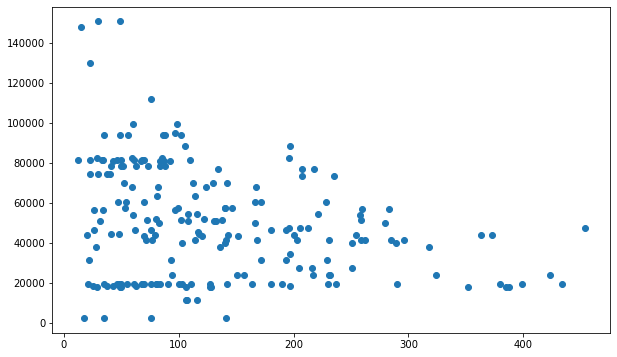

In [17]:
plt.scatter(merged['ED_Visits'], merged['Income'])
plt.show()

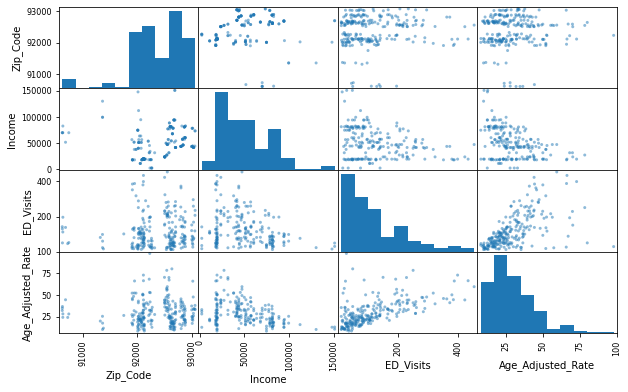

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(merged[['Zip_Code', 'Income', 'ED_Visits', 'Age_Adjusted_Rate']])
print()

In [19]:
ozone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77493 entries, 0 to 77492
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  77493 non-null  object 
 1   Daily Max 8-hour Ozone Concentration  77493 non-null  float64
 2   zip                                   77493 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [20]:
ozone['Date'] = pd.to_datetime(ozone['Date'], format = '%Y')
ozone['Date'].describe()

ValueError: unconverted data remains: -01-01